# Домашняя работа №4
## Автор: Гудошникова Юлия Владимировна, 2 группа
### Выбранный организм: horse
### Хромосома: 31

# Подготовка среды


Загружаем zhunt в Colab Notebook и добавляем права на исполнение [chmod a+x zhunt];  

In [ ]:
!chmod a+x zhunt3-alan.c

Собираем zhunt

In [ ]:
!gcc zhunt3-alan.c -lm -o zhunt3

zhunt3-alan.c: In function ‘user_regret’:
zhunt3-alan.c:303:7: warning: implicit declaration of function ‘gets’; did you mean ‘fgets’? [-Wimplicit-function-declaration]
  303 |       gets( tempstr );
      |       ^~~~
      |       fgets
/usr/bin/ld: /tmp/cc2PZ3fb.o: in function `user_regret':
zhunt3-alan.c:(.text+0xba7): warning: the `gets' function is dangerous and should not be used.


Запускаем zhunt

In [ ]:
!./zhunt3 12 8 12 chromosome31.fa

dinucleotides 12
min/max 8 12
min/max 8 12
operating on chromosome31.fa
calculating zscore
opening chromosome31.fa
inputting sequence
opening chromosome31.fa.Z-SCORE

 run time=6265 sec
use min/max 8 12
analyzing_zscore
opening chromosome31.fa.Z-SCORE
opening chromosome31.fa
inputting sequence
cat: chromosome31.fasta.Z-SCORE: No such file or directory


# 1.	Сколько участков Z-ДНК найдено в геноме?

Рассмотрим данные, используя read_csv

In [ ]:
import pandas as pd
z=pd.read_csv("chromosome31.fa.Z-SCORE", skiprows=1, names=["Start","End","1","2","3","Score","Seq","4"], delim_whitespace=True)
     

Проверим наличие строк с Z-score более 300

In [ ]:
z.loc[z['Score'] >= 300]

,Start,End,1,2,3,Score,Seq,4
282,283,307,24,21.995,42.818,410.8532,tgagcagtgccgtgtccgcgcccg,ASASASSAASASASASASASASAS
284,285,309,24,21.657,47.068,609.2875,agcagtgccgtgtccgcgcccggg,SASASAASASASASASASASASAS
286,287,309,22,21.544,47.249,697.1970,cagtgccgtgtccgcgcccggg,ASSAASASASASASASASASAS
288,289,309,20,21.342,48.385,891.5444,gtgccgtgtccgcgcccggg,SAASASASASASASASASAS
289,290,306,16,22.173,38.395,335.7230,tgccgtgtccgcgccc,ASSASASASASASASA
...,...,...,...,...,...,...,...,...
25992499,25992500,25992516,16,18.697,42.930,35596.5400,acgcgcacgcgcgata,SASASASASASAASAS
25992500,25992501,25992517,16,19.529,38.077,10136.2000,cgcgcacgcgcgatat,ASASASASASSASASA
25992501,25992502,25992518,16,19.554,37.376,9765.1250,gcgcacgcgcgatatg,SASASASASAASASAS
25992502,25992503,25992519,16,21.537,31.938,703.3578,cgcacgcgcgatatgc,ASASASASSASASASA


Это все участки Z-DNA, в данном гене их ***81621***

# 2.	Сколько квадруплексов найдено в геноме?

Импортируем необходимые библиотеки

In [ ]:
!pip install biopython
import re
from Bio import SeqIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.7 MB/s eta 0:00:00


Посчитаем квадруплексы, используя паттерн

In [ ]:
input_file = "chromosome31.fa"
fasta_sequence = SeqIO.parse(input_file,'fasta')
for record in SeqIO.parse(input_file, "fasta"):  #для каждой записи из файла 
  print("%s %i" % (record.id, len(record)))  #печатаем зазвание и длину
  name, sequence = record.id, str(record.seq) 
pattern="(?:G{3,}[ATGC]{1,7}){3,}G{3,}"
pattern_C="(?:C{3,}[ATGC]{1,7}){3,}C{3,}"
PQS=[[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern,sequence,re.IGNORECASE)] #re.IGNORECASE отвечает за игнорирования отличий между заглавными и строчными буквами
print(len(PQS)) #выводим число найденных квадруплексов на положительном стренде
PQS_minus=[[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern_C,sequence,re.IGNORECASE)] #re.IGNORECASE отвечает за игнорирования отличий между заглавными и строчными буквами
print(len(PQS_minus)) #выводим число найденных квадруплексов на отрицательном стренде

chr31 26001039
1508
1477


Ответ: 1508 + 1477 = 2985 квадруплексов

# 3.	В какие участки генома (гены или межгеннное пространство или на пересечении) попадают Z-ДНК и квадруплексы

Скачиваем аннотацию хромосомы с этого ресурса
https://www.ncbi.nlm.nih.gov/genome/gdv/browser/genome/?chr=31&id=GCF_002863925.1

Файл аннотации: "Genes  NCBI Equus caballus Annotation Release 103  2018-01-26.CSV"

## Z-ДНК

In [ ]:
import pandas as pd
# загрузить таблицы
# Аннотация
genes_df = pd.read_csv("Genes  NCBI Equus caballus Annotation Release 103  2018-01-26.CSV", skiprows=1, names=["Accession","Start","Stop","Gene symbol","Strand",
                                                       "NCBI Gene ID","Name"], delimiter=",")
# удалить строки со значением NaN в столбце "Stop"
genes_df.dropna(subset=["Stop"], inplace=True)

# Данные Z-SCORE
elements_df = pd.read_csv("chromosome31.fa.Z-SCORE", skiprows=1, names=["Start","End","1","2","3","Score","Seq","4"],
                         delim_whitespace=True)

# отсортировать по столбцу "Start" аннотацию
count_genes = False
count_not_genes = False
genes_sorted = genes_df.sort_values(by=["Start"])


for index, row in elements_df.iterrows():
    iter = 0
    flag = False
    while (iter != genes_sorted.shape[0] - 1):
        start_value = int(genes_sorted["Start"].iloc[iter])
        end_value = int(genes_sorted["Stop"].iloc[iter])
        if row["Start"] >= start_value and row["End"] <= end_value:
            count_genes = True
            flag = True
            break
        else:
            iter += 1
    if not flag:
        count_not_genes = True
    if count_genes & count_not_genes:
        break
# Есть ли в генах
print(count_genes)
# Есть ли между генов
print(count_not_genes)

True
True


Как можно заметить, Z-ДНК есть попадают как в гены, так и в межгенные участки

## Квадруплексы

In [ ]:
import pandas as pd
# загрузить таблицы
# Аннотация
genes_df = pd.read_csv("Genes  NCBI Equus caballus Annotation Release 103  2018-01-26.CSV", skiprows=1, names=["Accession","Start","Stop","Gene symbol","Strand",
                                                       "NCBI Gene ID","Name"], delimiter=",")
# удалить строки со значением NaN в столбце "Stop"
genes_df.dropna(subset=["Stop"], inplace=True)

# Создание DataFrame из списков PQS_minus и PQS
df_PQS_minus = pd.DataFrame(PQS_minus, columns=["Start", "End", "Sequence"])
df_PQS = pd.DataFrame(PQS, columns=["Start", "End", "Sequence"])

# Объединение данных из df_PQS_minus и df_PQS
combined_data = pd.concat([df_PQS_minus, df_PQS])

# Сортировка данных по второму столбцу ("End")
sorted_data = combined_data.sort_values("End")
count_genes = False
count_not_genes = False
genes_sorted = genes_df.sort_values(by=["Start"])


for index, row in sorted_data.iterrows():
    iter = 0
    flag = False

    while iter < genes_sorted.shape[0]:
        start_value = int(genes_sorted["Start"].iloc[iter])
        end_value = int(genes_sorted["Stop"].iloc[iter])

        if start_value <= row["Start"] <= end_value or start_value <= row["End"] <= end_value:
            count_genes = True
            flag = True
            break
        else:
            iter += 1

    if not flag:
        count_not_genes = True

    if count_genes and count_not_genes:
        break

print("Есть ли в генах:", count_genes)
print("Есть ли между генами:", count_not_genes)

Есть ли в генах: True
Есть ли между генами: True


Как можно заметить, квадруплексы есть попадают как в гены, так и в межгенные участки

# 4.	Предоставить список генов, в промоторы которых попадает Z-ДНК. 

In [20]:
# 1. Определение стренда для каждого гена
genes_df["Strand"] = genes_df["Strand"].apply(lambda x: "-" if x.lower() == "minus" else "+")

# 2. Расчет координат промоторных участков
genes_df["Promoter Start"] = genes_df.apply(lambda row: row["Start"] - 1000 if row["Strand"] == "+" else row["Start"], axis=1)
genes_df["Promoter End"] = genes_df.apply(lambda row: row["Start"] if row["Strand"] == "+" else row["Start"] + 1000, axis=1)

# 3. Проверка попадания промоторных участков в Z-ДНК
genes_in_zdna = []
for _, gene_row in genes_df.iterrows():
    promoters_in_zdna = elements_df[
        (elements_df["Start"] >= gene_row["Promoter Start"]) &
        (elements_df["End"] <= gene_row["Promoter End"])
    ]
    if not promoters_in_zdna.empty:
        genes_in_zdna.append(gene_row["Gene symbol"])

# 4. Список генов с промоторами, попадающими в Z-ДНК
print ("Количество:", len(genes_in_zdna))
print("Гены с промоторами, попадающими в Z-ДНК:")
for gene in genes_in_zdna:
    print(gene)

Количество: 43
Гены с промоторами, попадающими в Z-ДНК:
LOC100146467
LOC100146112
LOC111771388
LOC111771381
LOC102148909
LOC100051214
LOC100146311
LOC100051359
LOC100051428
LOC100051498
LOC100051570
LOC100051641
LOC100051713
LOC100147496
LOC100146200
PDCD2
TBP
PSMB1
FAM120B
DLL1
LOC111771424
ERMARD
TCTE3
LOC111771421
PHF10
C31H6orf120
WDR27
LOC100629836
THBS2
SMOC2
LOC100630354
DACT2
FRMD1
KIF25
AFDN
UNC93A
TCP10L2
GPR31
CCR6
LOC102149256
FGFR1OP
RNASET2
RPS6KA2


**Количество: 43**

**Гены с промоторами, попадающими в Z-ДНК:**

LOC100146467
LOC100146112
LOC111771388
LOC111771381
LOC102148909
LOC100051214
LOC100146311
LOC100051359
LOC100051428
LOC100051498
LOC100051570
LOC100051641
LOC100051713
LOC100147496
LOC100146200
PDCD2
TBP
PSMB1
FAM120B
DLL1
LOC111771424
ERMARD
TCTE3
LOC111771421
PHF10
C31H6orf120
WDR27
LOC100629836
THBS2
SMOC2
LOC100630354
DACT2
FRMD1
KIF25
AFDN
UNC93A
TCP10L2
GPR31
CCR6
LOC102149256
FGFR1OP
RNASET2
RPS6KA2

# 5.	Предоставить список генов, в промоторы которых попадает квадруплексы.

In [21]:
# 1. Определение стренда для каждого гена
genes_df["Strand"] = genes_df["Strand"].apply(lambda x: "-" if x.lower() == "minus" else "+")

# 2. Расчет координат промоторных участков
genes_df["Promoter Start"] = genes_df.apply(lambda row: row["Start"] - 1000 if row["Strand"] == "+" else row["Start"], axis=1)
genes_df["Promoter End"] = genes_df.apply(lambda row: row["Start"] if row["Strand"] == "+" else row["Start"] + 1000, axis=1)

# 3. Проверка попадания промоторных участков в квадруплексы
genes_in_cvadr = []
for _, gene_row in genes_df.iterrows():
    promoters_in_cvadr = combined_data[
        (combined_data["Start"] >= gene_row["Promoter Start"]) &
        (combined_data["End"] <= gene_row["Promoter End"])
    ]
    if not promoters_in_cvadr.empty:
        genes_in_cvadr.append(gene_row["Gene symbol"])

# 4. Список генов с промоторами, попадающими в Z-ДНК
print ("Количество:", len(genes_in_cvadr))
print("Гены с промоторами, попадающими в Z-ДНК:")
for gene in genes_in_cvadr:
    print(gene)


Количество: 48
Гены с промоторами, попадающими в Z-ДНК:
LOC102148909
PDCD2
DLL1
TCTE3
WDR27
LOC100630354
FRMD1
KIF25
FGFR1OP
RNASET2
RPS6KA2
LOC106782922
TBXT
PDE10A
LOC111771380
PACRG
PRKN
IGF2R
SOD2
TAGAP
RSPH3
EZR
SYTL3
DYNLT1
LOC111771425
TMEM242
LOC111771419
RGS17
MTRF1L
FBXO5
ESR1
PPP1R14C
LOC100063808
LOC102149750
LOC100064229
LOC100064292
LRP11
LOC100064584
KATNA1
FBXO30
EPM2A
TRNAL-UAA
ADAT2
HIVEP2
ADGRG6
LOC100067848
LOC111771410
LOC111771376


**Количество: 48**

**Гены с промоторами, попадающими в Z-ДНК:**

LOC102148909
PDCD2
DLL1
TCTE3
WDR27
LOC100630354
FRMD1
KIF25
FGFR1OP
RNASET2
RPS6KA2
LOC106782922
TBXT
PDE10A
LOC111771380
PACRG
PRKN
IGF2R
SOD2
TAGAP
RSPH3
EZR
SYTL3
DYNLT1
LOC111771425
TMEM242
LOC111771419
RGS17
MTRF1L
FBXO5
ESR1
PPP1R14C
LOC100063808
LOC102149750
LOC100064229
LOC100064292
LRP11
LOC100064584
KATNA1
FBXO30
EPM2A
TRNAL-UAA
ADAT2
HIVEP2
ADGRG6
LOC100067848
LOC111771410
LOC111771376

# 6.	На 10 баллов – сделать Gene Enrichment Analysis 

## К пункту 4

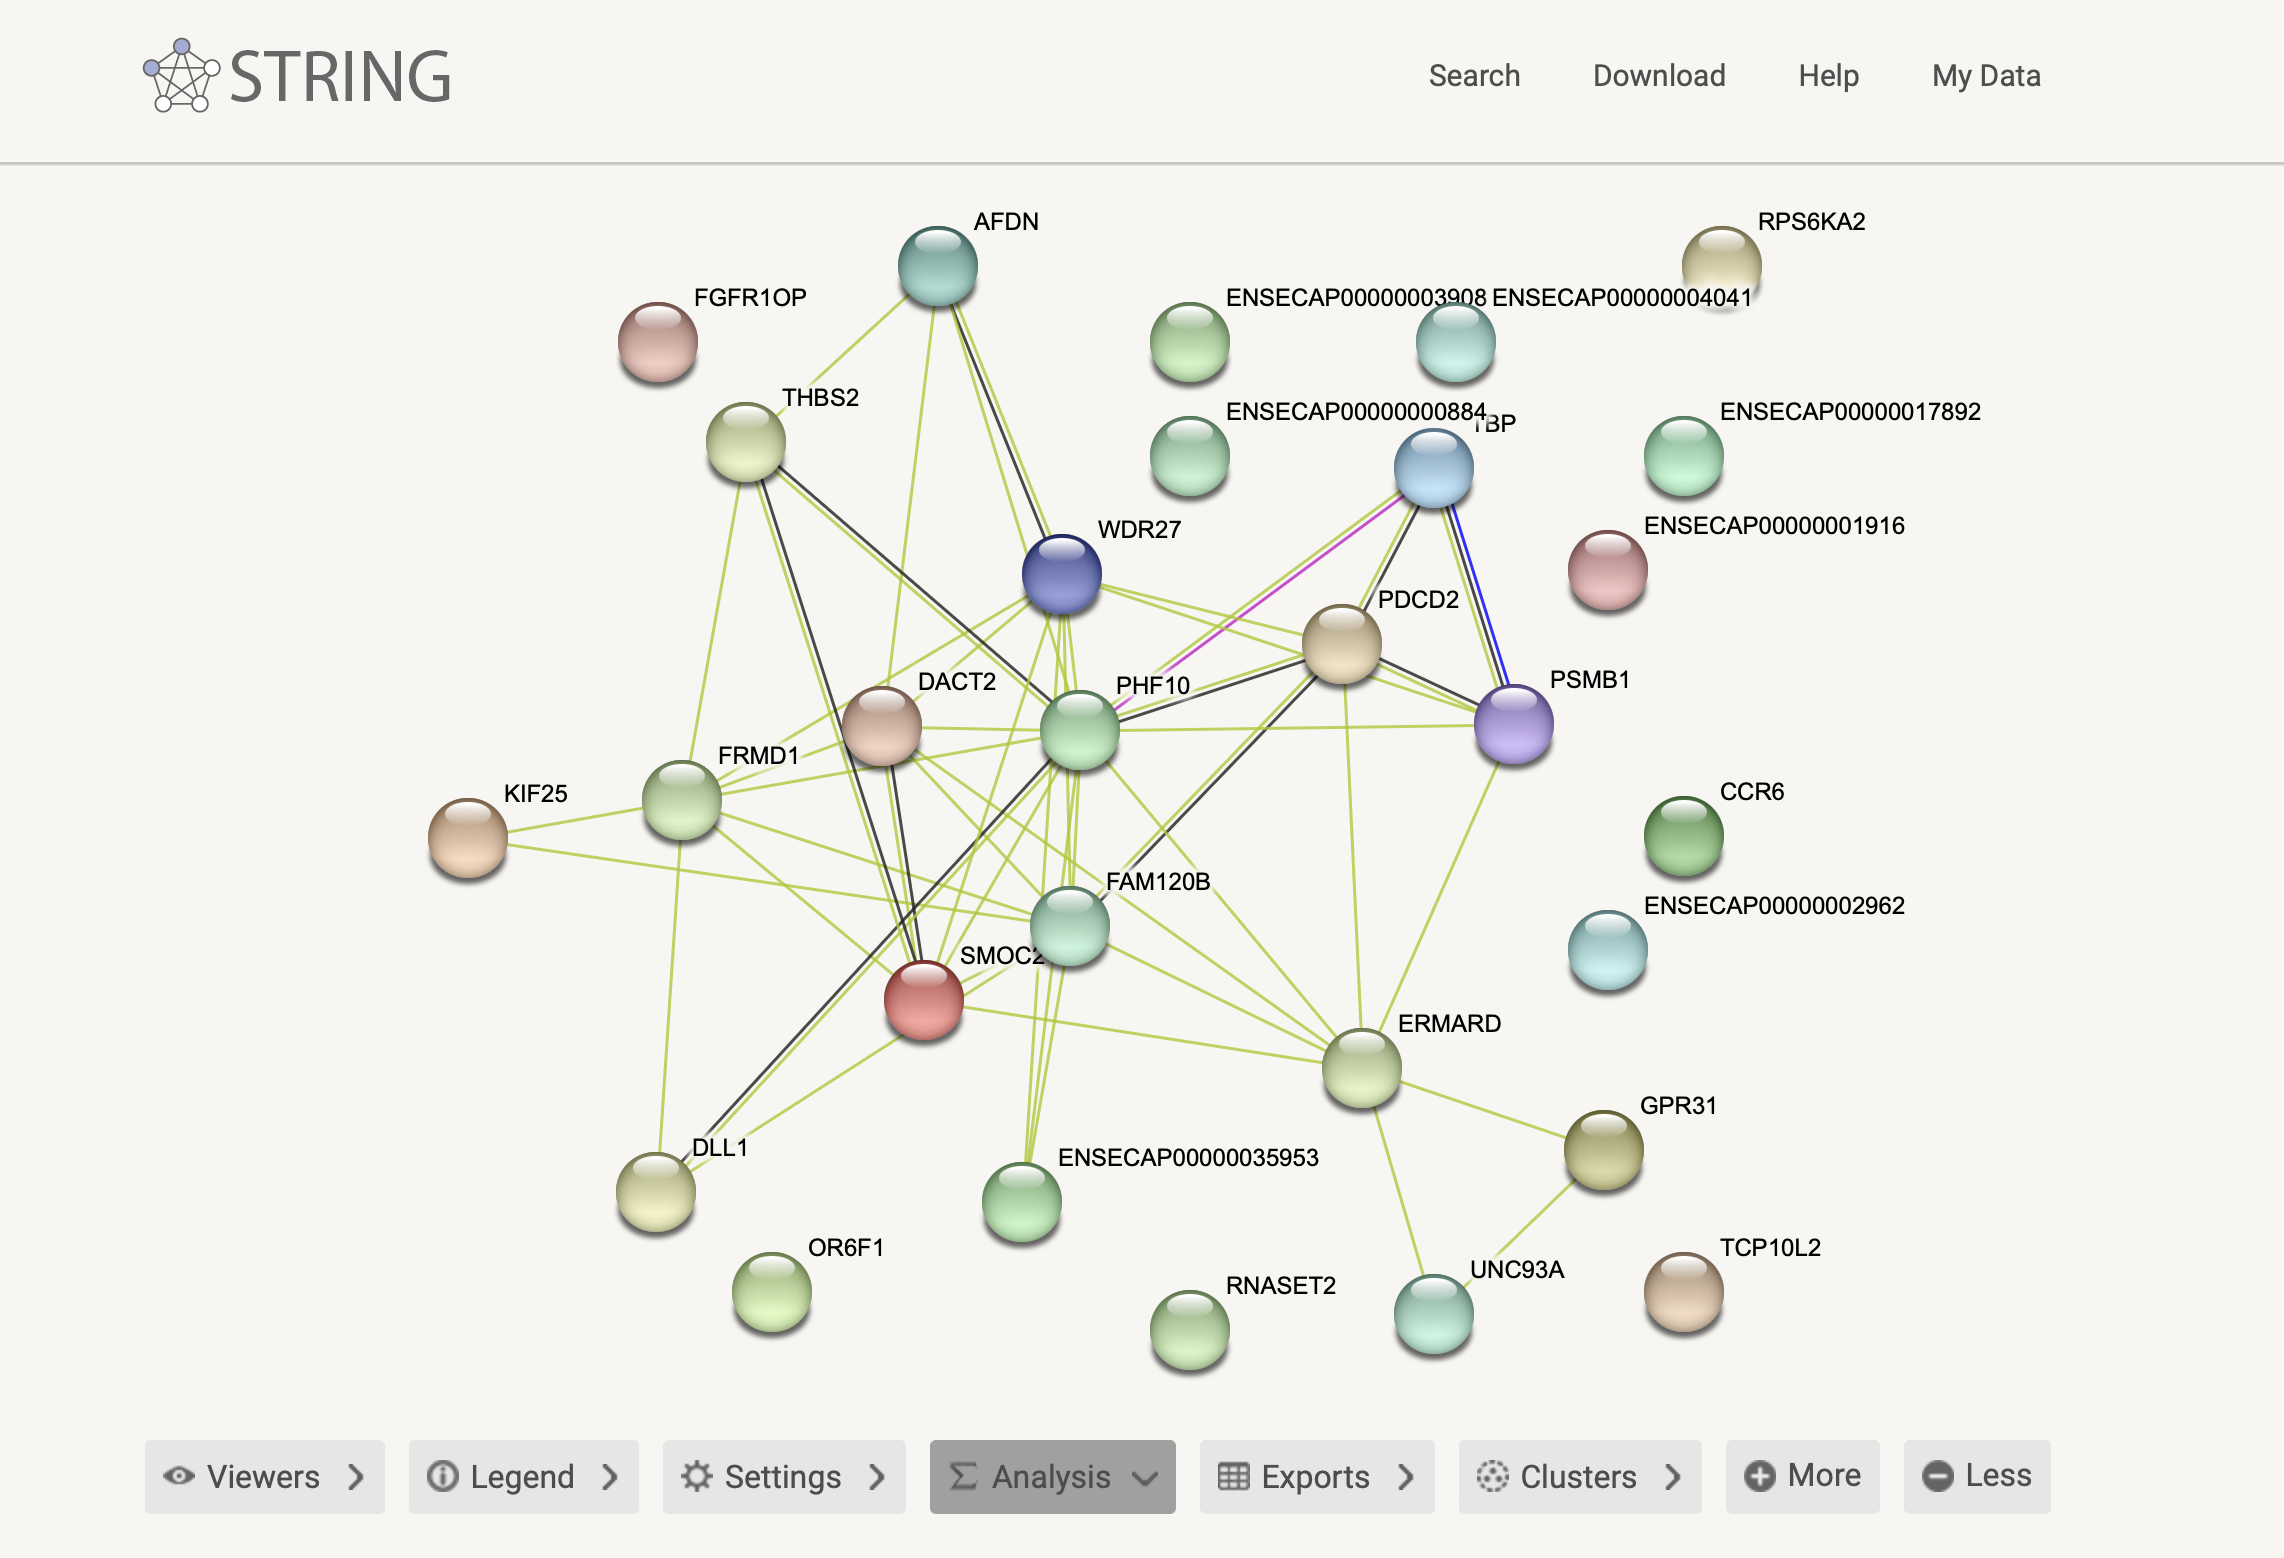

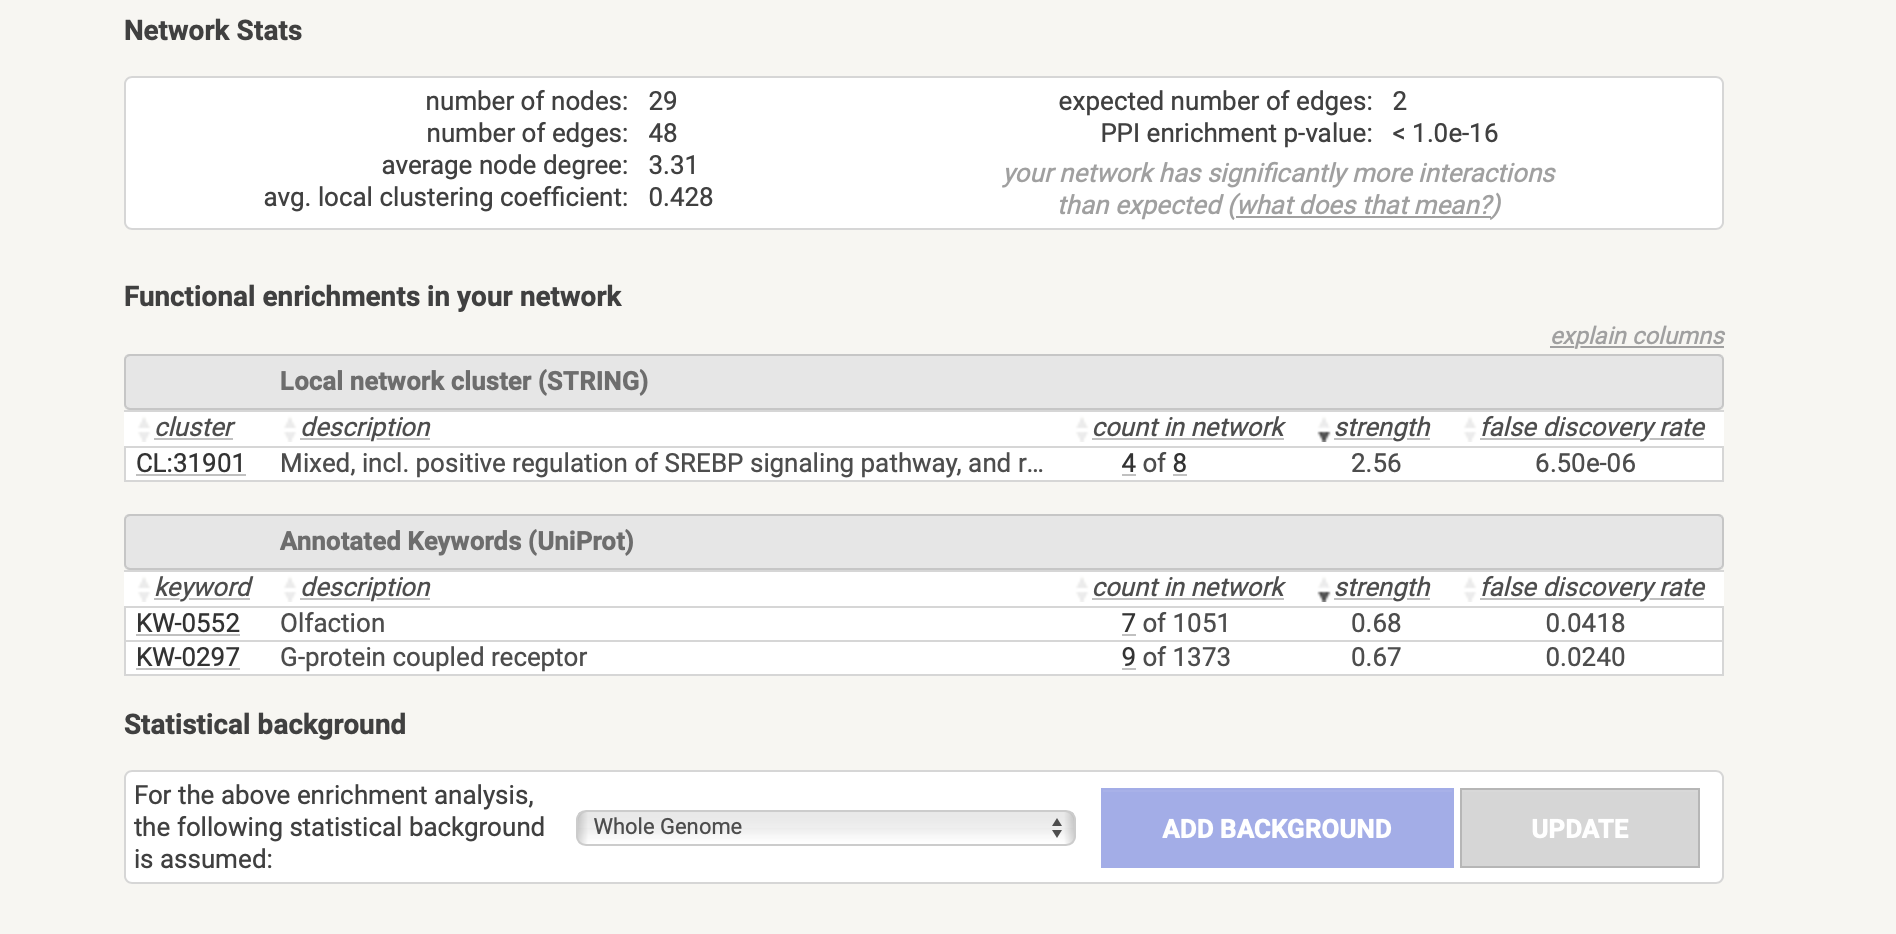

Выгруженная таблица: /content/string_interactions.tsv

## К пункту 5

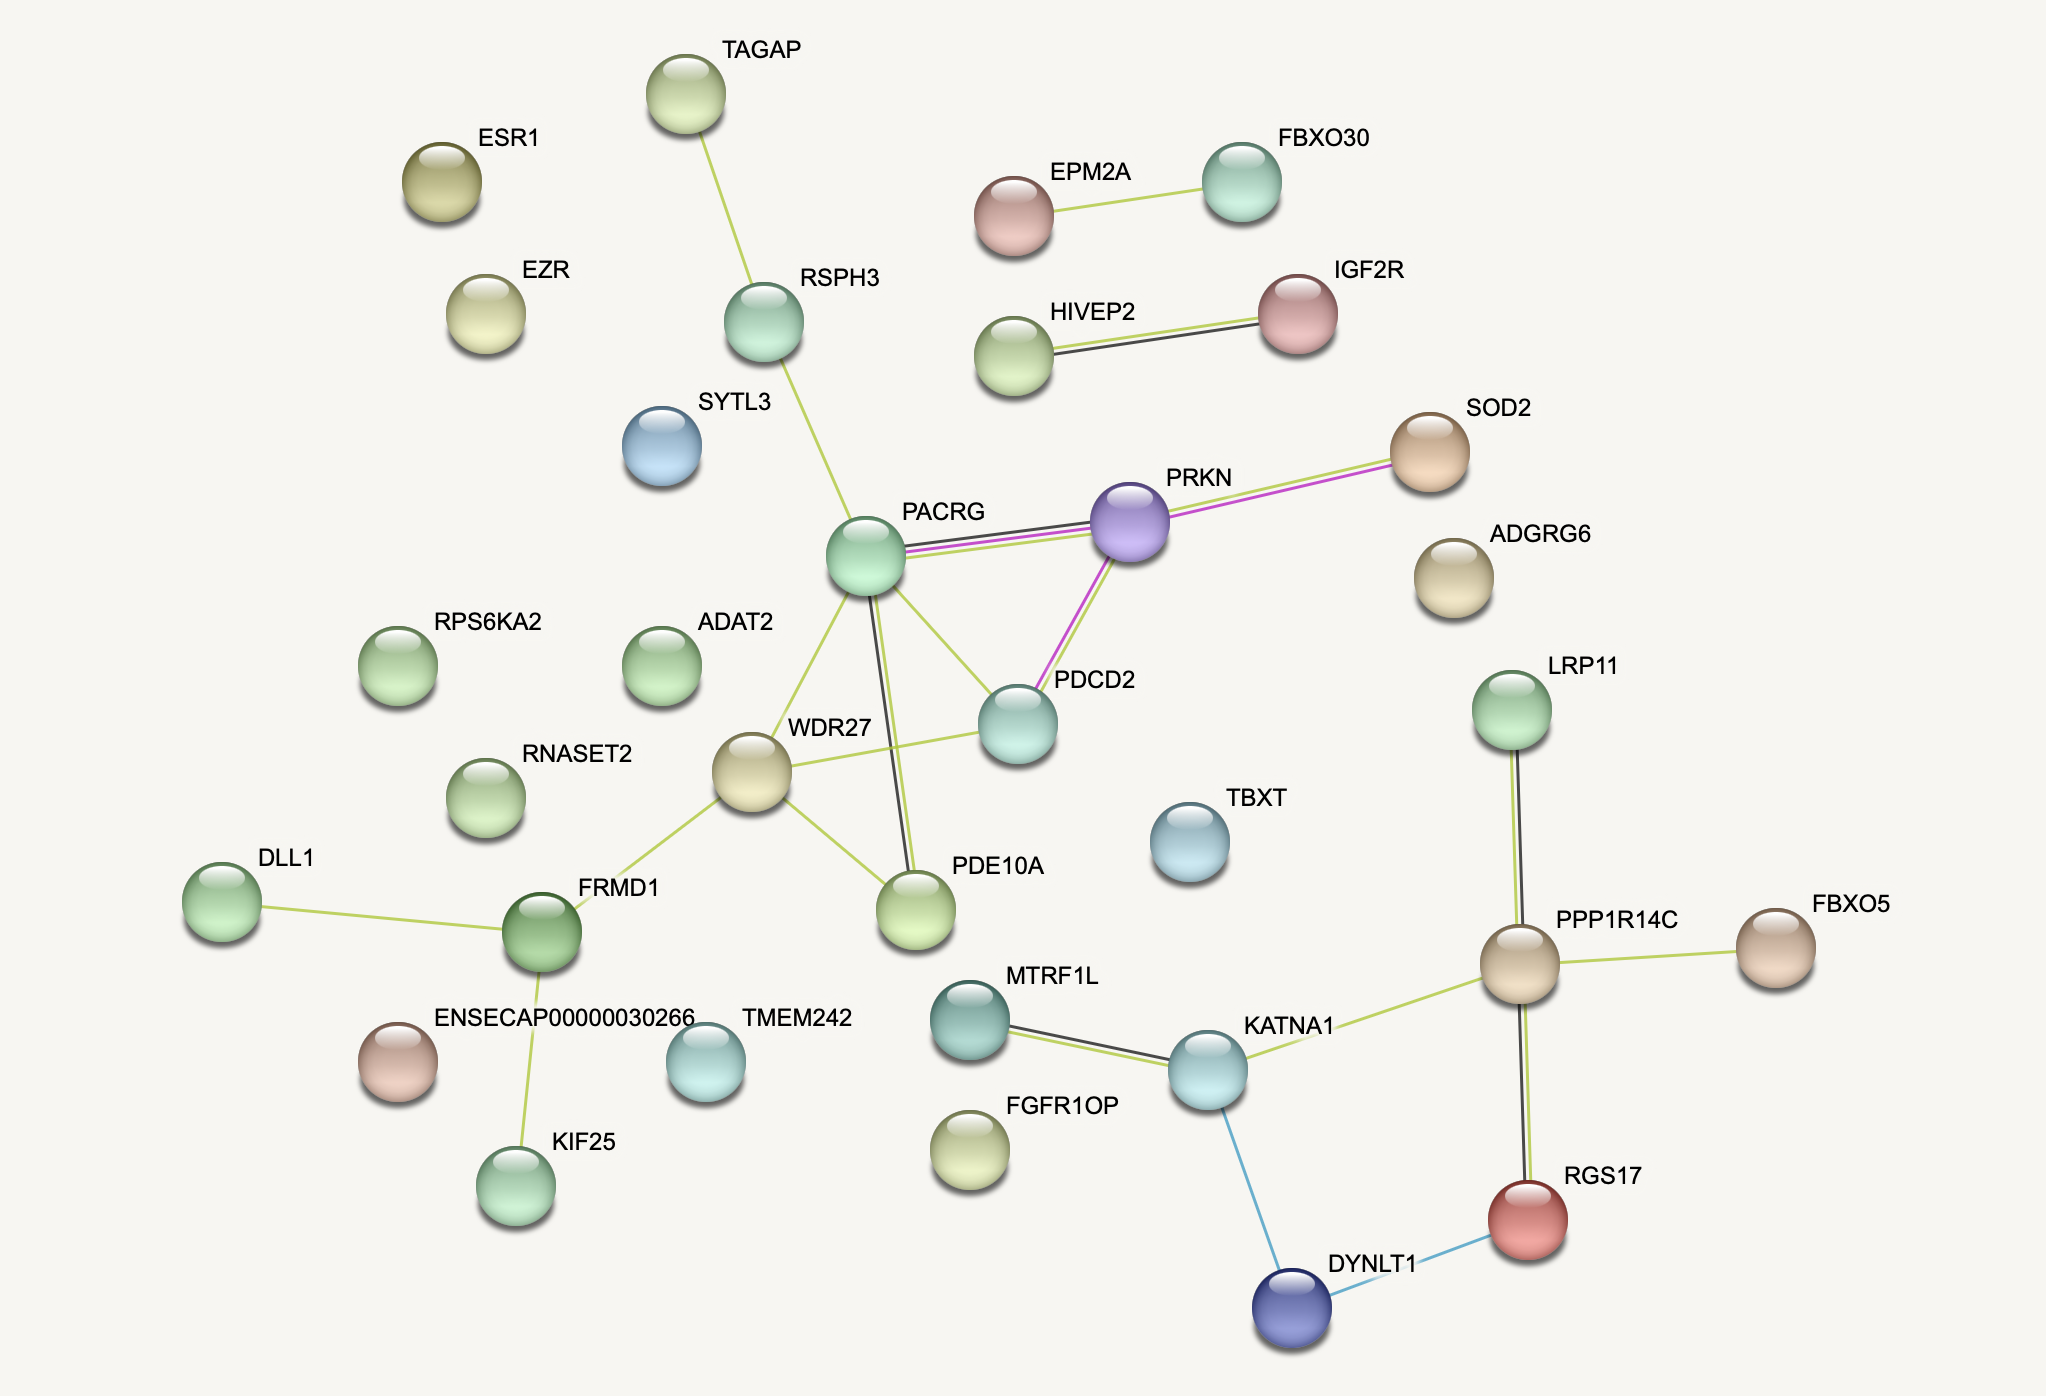

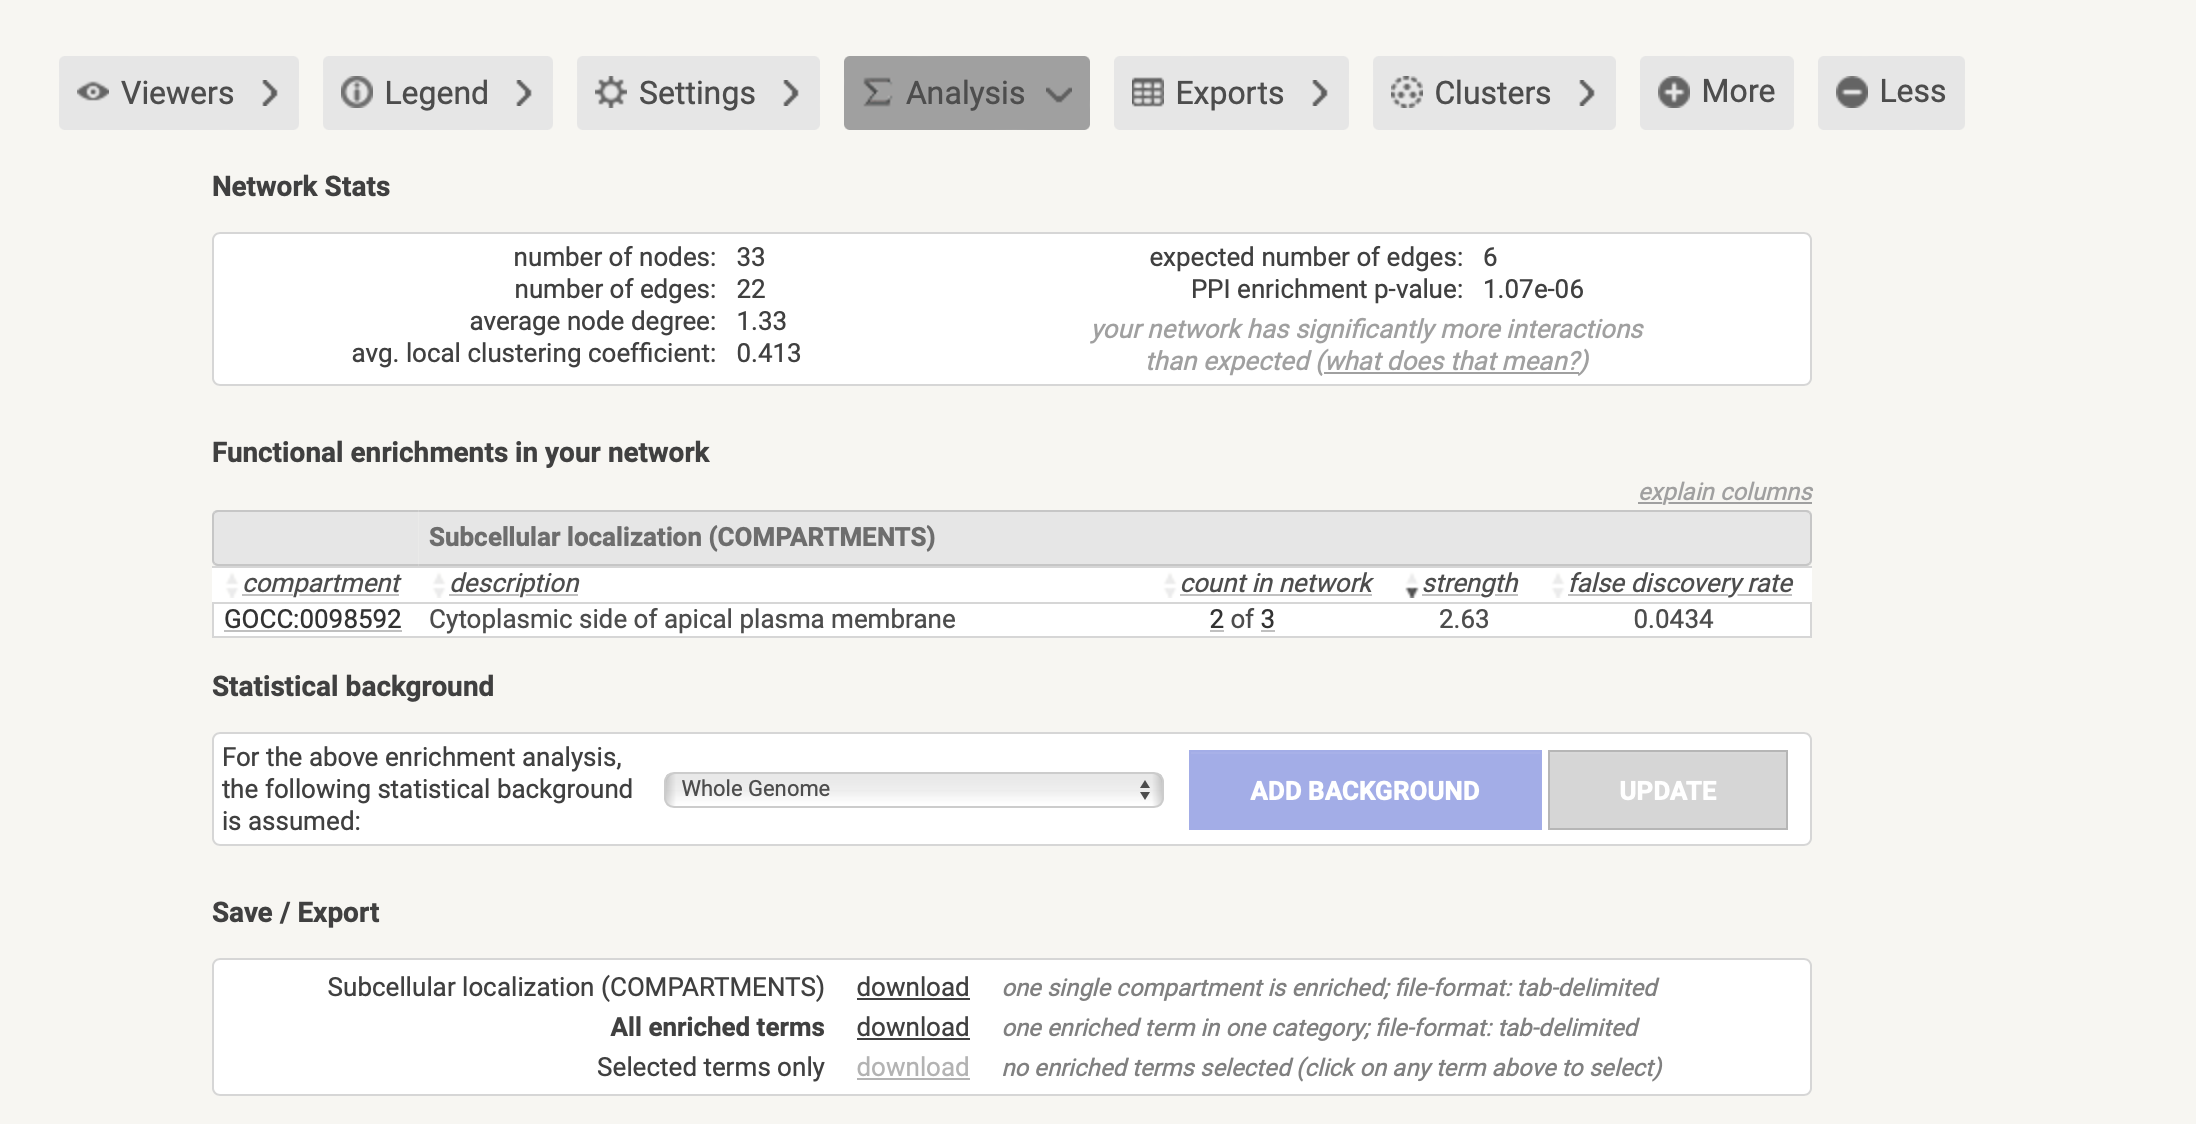

Выгруженная таблица: /content/string_interactions-2.tsv